# 442 Poisson Fit

In [1]:
#Import ueful librarie and functions to use in your analysis
import numpy as np
#from scipy.stats import poisson
import matplotlib.pyplot as plt

from ROOT import TCanvas, TGraphErrors, TF1, TH1F, gStyle
from ROOT import gROOT
from array import array

Welcome to JupyROOT 6.16/00


In [2]:
# Random data points with Poisson distribution with mean 100 - put your data points here

file_kv = open("time.txt", "r")
file_kv.readline()
file_kv.readline()
file_kv.readline()
data = []
sx=[]
data1=[]
for line in file_kv:
    data.append(float(line))
    sx.append(np.sqrt(float(line)))
for i in range (len(data)-1):
    data1.append(data[i]+data[i+1])
    
ndata = len(data1)

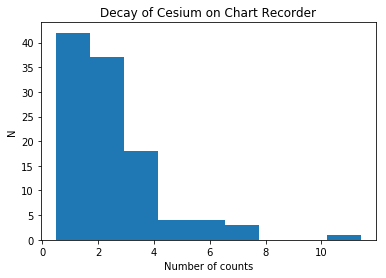

In [3]:
#Plot the histogram of your data with a given bin number (here 20)
plt.figure()
plt.hist(data1,9)
plt.ylabel("N")
plt.xlabel("Number of counts")
plt.title("Decay of Cesium on Chart Recorder")
plt.show()

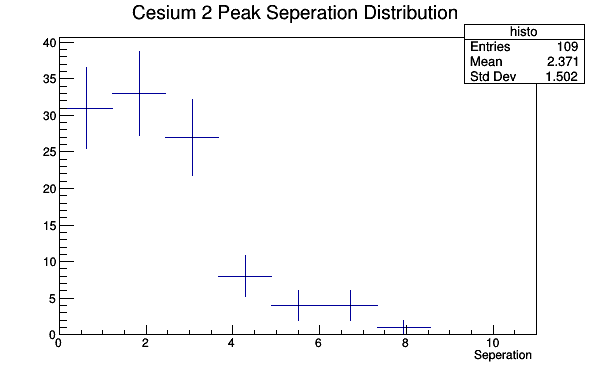

In [4]:
#Create a canvas to draw your histograms and functions
c1 = TCanvas( 'c1', 'Poisson Graph', 200, 10, 600, 400 ) 

#define a histogram with 20 bins between 60-120 (Change the8e values according to your data sets!!!)
histo = TH1F("histo", "Cesium 2 Peak Seperation Distribution ",9, 0, 11) 
#Label the X-Y axi1
histo.GetYaxis().SetTitle("")
histo.GetXaxis ().SetTitle ("Seperation ");

#Fill the randomly generated data into your histogram
for data_point in data1:
    histo.Fill(data_point)

#Draw your histogram with error bars and draw it on the canvas
histo.SetFillColor(10)
histo.Draw("E")
c1.Draw()

 FCN=4.9796 FROM MINOS     STATUS=SUCCESSFUL     27 CALLS         144 TOTAL
                     EDM=1.89884e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.30869e+02   1.29346e+01   6.44414e-03   6.13279e-11
   2  p1           2.08117e+00   1.66673e-01   1.66673e-01  -2.55986e-06


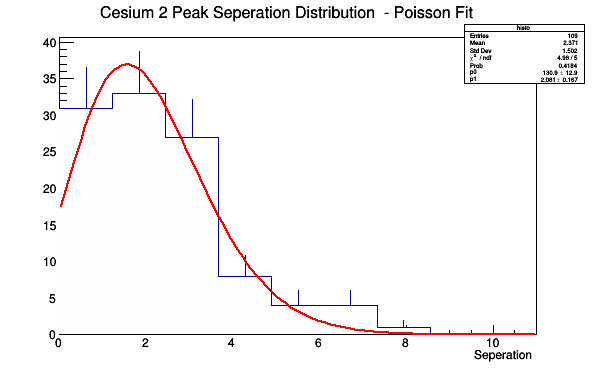

In [5]:
# Define the Poisson function from TMath library in ROOT to fit with two parameters:
#[0]: normalizing constant
#[1]: mean
fpois = TF1("fpois","[0]*TMath::Poisson(x,[1])",0,11) #(Change interval values (60,120) according to your data sets!!!)
histo.Draw("E")
#Set the parameters to guide the ROOT fitter to converge easily and fit your histogram
fpois.SetParameters(0, 1) # give reasonable estimates for your parameters to guide ROOT fit to converge
fpois.SetFillColor(42);
histo.Fit("fpois", "E")
histo.SetTitle("Cesium 2 Peak Seperation Distribution  - Poisson Fit")
#Set the options to display fit parameters and chi_squared value on the graph
gStyle.SetOptFit(1111)
histo.Draw("same")
c1.Draw()

 FCN=5.05871 FROM MINOS     STATUS=SUCCESSFUL    142 CALLS         485 TOTAL
                     EDM=1.03471e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.34292e+01   4.15527e+00   1.08573e-02   2.65038e-05
   2  Mean         1.13504e+00   9.05708e-01  -6.52710e-04  -5.07255e-04
   3  Sigma        2.12830e+00   6.63546e-01   6.63546e-01  -3.88428e-02


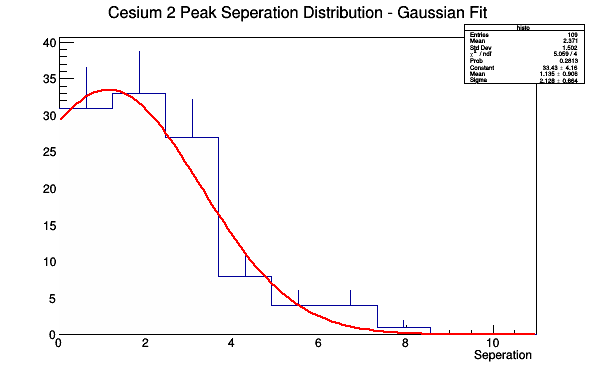

In [6]:
#Do the similar procedure for Gaussian function (which now has 3 parameters: normalization, mean, standard dev.)
fgaus = TF1("fgaus","gaus")
fgaus.SetParameters(10, 100, 5) # give reasonable estimates for your parameters to guide ROOT fit to converge
fgaus.SetFillColor(45);
histo.Fit("fgaus", "E")

histo.SetTitle("Cesium 2 Peak Seperation Distribution - Gaussian Fit")
histo.Draw("same")
c1.Draw("same")

 FCN=3.35365 FROM MINOS     STATUS=SUCCESSFUL     16 CALLS         178 TOTAL
                     EDM=6.84594e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.30719e-01   6.05895e-02   5.29612e-04  -1.34456e-04
   2  p1           1.23830e+02   1.21452e+01   1.21452e+01  -8.91184e-08


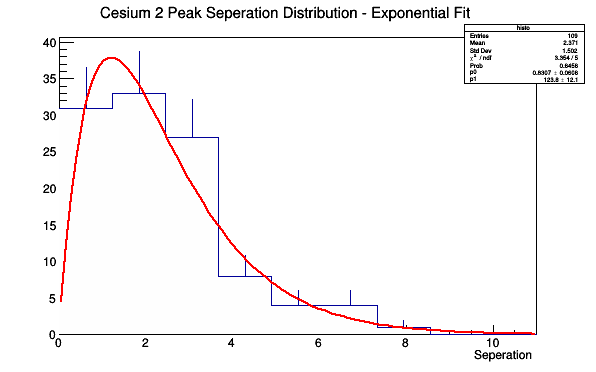

In [7]:
exp = TF1("exp","[1]*[0]**2*x*TMath::Exp(-[0]*x)")
exp.SetParameters(5,1) # give reasonable estimates for your parameters to guide ROOT fit to converge
exp.SetFillColor(45);
histo.Fit("exp", "E")

histo.SetTitle("Cesium 2 Peak Seperation Distribution - Exponential Fit")
histo.Draw("same")
c1.Draw("same")